In [3]:
# Import necessary libraries
import pandas as pd
from collections import Counter
from sudachipy import tokenizer, dictionary

# Initialize SudachiPy tokenizer
tokenizer_obj = dictionary.Dictionary().create()
mode = tokenizer.Tokenizer.SplitMode.C  # Fine-grained tokenization

# Define a function to tokenize and calculate word frequencies
def process_csv_and_count_frequencies(csv_path):
    """
    Reads a CSV file containing Japanese sentences in a column named 'sentence',
    tokenizes the sentences using SudachiPy, and calculates word frequencies.
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)
    
    # Ensure the 'sentence' column exists
    if 'sentence' not in df.columns:
        raise ValueError("CSV must contain a column named 'sentence'")
    
    # Tokenize sentences and count word frequencies
    word_frequencies = Counter()
    for sentence in df['sentence']:
        # Tokenize the sentence
        tokens = [m.surface() for m in tokenizer_obj.tokenize(sentence, mode)]
        # Update the frequency counter
        word_frequencies.update(tokens)
    
    # Sort frequencies from least to most frequent
    sorted_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1])
    
    return sorted_frequencies

# Example usage:
# Replace 'your_file.csv' with the path to your CSV file
csv_path = 'sentences.csv'  # Update this with the correct file path
word_frequencies = process_csv_and_count_frequencies(csv_path)

# Display the word frequencies
print("Word frequencies (sorted by count):")
for word, count in word_frequencies:
    print(f"{word}: {count}")

Word frequencies (sorted by count):
即座: 1
再度: 1
一流: 1
揃える: 1
潰さ: 1
増やせ: 1
充分: 1
いえよう: 1
巻か: 1
れろ: 1
塞ぐ: 1
惜しみ: 1
荒廃: 1
折り: 1
開闢: 1
死し: 1
昇り: 1
依ら: 1
尽くせる: 1
売却: 1
土台: 1
浸し: 1
信仰心: 1
信じれ: 1
とどろい: 1
回せ: 1
配れる: 1
10002: 1
ピッケル: 1
地べた: 1
はいずる: 1
ばらまい: 1
ケチ: 1
8002: 1
たまーに: 1
恋しい: 1
羨ましく: 1
2002: 1
エイヤッホイサッ: 1
4002: 1
掘る: 1
コツ: 1
無心: 1
続けりゃ: 1
掘り出せ: 1
ひと休み: 1
6002: 1
ググッ: 1
溜まれ: 1
掘り起こせる: 1
掘り出せる: 1
高慢: 1
汗水: 1
探索: 1
小屋: 1
了承: 1
業務: 1
総量: 1
コケーーッ: 1
メェェェー: 1
メェーメェー: 1
ンンンメエエエエッッッ: 1
メェーッ: 1
ンンンメェェェ: 1
メェーー: 1
メェメェ: 1
メヘェッ: 1
メエ: 1
メッ: 1
えぇぇ: 1
ンメェ: 1
鍛冶: 1
取り扱っ: 1
29: 1
28: 1
27: 1
26: 1
24: 1
23: 1
22: 1
21: 1
19: 1
17: 1
16: 1
15: 1
14: 1
13: 1
12: 1
11: 1
9: 1
エンディング: 1
噛みつか: 1
メェッ: 1
食いつい: 1
メエエェェッ: 1
暗躍: 1
全域: 1
供与: 1
無関係: 1
検閲: 1
アレインレーニス: 1
残れ: 1
残骸: 1
ボク: 1
こわい: 1
閉所: 1
高所: 1
涙もろい: 1
見つめる: 1
よろこん: 1
クルス: 1
帰り際: 1
感づい: 1
われ: 1
進化: 1
夫: 1
無くなり: 1
去年: 1
手々: 1
遠かっ: 1
跨る: 1
宗教: 1
延命: 1
再生: 1
ホホ: 1
思し召し: 1
毒気: 1
滅ぶ: 1
常態化: 1
物語っ: 1
組み込ん: 1
やり直せる: 1
生まれ変わり: 1
ただ中: 1
強め: 1
臨もう: 1
やりなおす: 1
清

In [4]:
import requests

def fetch_word_data_jisho(word):
    """
    Fetches Japanese word data (definition, reading, English meanings) from Jisho.org.
    """
    url = f"https://jisho.org/api/v1/search/words?keyword={word}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if data['data']:
            # Extract the first result's information
            word_info = data['data'][0]
            japanese_definition = word_info.get('japanese', [{}])[0].get('reading', '')
            english_definition = ", ".join(word_info.get('senses', [{}])[0].get('english_definitions', []))
            return japanese_definition, english_definition
        else:
            return None, None
    else:
        print(f"Error: Unable to fetch data for {word}")
        return None, None

# Test with an example word
test_word = "噛みつか"
japanese_def, english_def = fetch_word_data_jisho(test_word)
print(f"Japanese Definition: {japanese_def}")
print(f"English Definition: {english_def}")

Japanese Definition: かみつく
English Definition: to bite (at), to snap at


In [ ]:
import collections

# Assuming word_frequencies is a list or other iterable of words
word_counter = collections.Counter(word_frequencies)
for i, word in enumerate(word_frequencies[:100]):
    print(f"{i+1}: {word}: {fetch_word_data_jisho(word)}")


1: ('即座', 1): ('そくざ', 'immediate, right there on the spot, impromptu, instant, instantaneous')
2: ('再度', 1): ('さいど', 'a second time, again, once more, twice')
3: ('一流', 1): ('いちりゅう', 'first-class, first-rate, top-flight, top-ranking, leading, eminent, top')
4: ('揃える', 1): ('そろえる', 'to collect, to gather, to get together, to complete (a collection)')
5: ('潰さ', 1): (None, None)
6: ('増やせ', 1): ('ふやす', 'to increase, to add to, to augment')
7: ('充分', 1): ('じゅうぶん', 'enough, sufficient, plenty, adequate, satisfactory')
8: ('いえよう', 1): ('いえる', 'to be possible to say, to be able to say')
9: ('巻か', 1): ('かんとうか', 'prefatory song or poem, opening song')
10: ('れろ', 1): (None, None)
11: ('塞ぐ', 1): ('ふさぐ', 'to stop up, to close up, to block (up), to plug up, to shut up, to cover (ears, eyes, etc.), to close (eyes, mouth)')
12: ('惜しみ', 1): (None, None)
13: ('荒廃', 1): ('こうはい', 'ruin, destruction, devastation, waste, decay')
14: ('折り', 1): ('おり', 'opportunity, chance, occasion, time')
15: ('開闢', 1): ('か

In [1]:
# Import necessary libraries
import pandas as pd
from collections import Counter, defaultdict
from sudachipy import tokenizer, dictionary
import requests

# Initialize SudachiPy tokenizer
tokenizer_obj = dictionary.Dictionary().create()
mode = tokenizer.Tokenizer.SplitMode.C  # Fine-grained tokenization

# Define a function to fetch translation using Jisho.org
def fetch_word_data_jisho(word):
    """
    Fetches Japanese word data (definition, reading, English meanings) from Jisho.org.
    """
    url = f"https://jisho.org/api/v1/search/words?keyword={word}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if data['data']:
            # Extract the first result's information
            word_info = data['data'][0]
            japanese_definition = word_info.get('japanese', [{}])[0].get('reading', '')
            english_definition = ", ".join(word_info.get('senses', [{}])[0].get('english_definitions', []))
            return japanese_definition, english_definition
        else:
            return None, None
    else:
        print(f"Error: Unable to fetch data for {word}")
        return None, None

# Define a function to process the CSV and count word frequencies
def process_csv_and_generate_sentences(csv_path, max_sentences=5):
    """
    Reads a CSV file containing Japanese sentences in a column named 'sentence',
    tokenizes the sentences using SudachiPy, calculates word frequencies,
    and retrieves example sentences (up to max_sentences) with translations.
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)
    
    # Ensure the 'sentence' column exists
    if 'sentence' not in df.columns:
        raise ValueError("CSV must contain a column named 'sentence'")
    
    # Tokenize sentences and map words to example sentences
    word_frequencies = Counter()
    word_to_sentences = defaultdict(list)
    
    for sentence in df['sentence']:
        # Tokenize the sentence
        tokens = [m.surface() for m in tokenizer_obj.tokenize(sentence, mode)]
        # Update the frequency counter
        word_frequencies.update(tokens)
        # Map words to example sentences (limit to max_sentences)
        for token in tokens:
            if len(word_to_sentences[token]) < max_sentences:
                word_to_sentences[token].append(sentence)
    
    # Prepare the output data
    output_data = []
    
    for word, count in word_frequencies.items():
        # Fetch translations
        japanese_definition, english_definition = fetch_word_data_jisho(word)
        
        # Get example sentences
        sentences = word_to_sentences[word]
        row = {
            'word': word,
            'frequency': count,
            'japanese_definition': japanese_definition,
            'english_definition': english_definition
        }
        
        # Add example sentences and their translations
        for i, sentence in enumerate(sentences):
            row[f'sentence{i+1}_jp'] = sentence
            row[f'sentence{i+1}_en'] = fetch_translation(sentence)  # Implement your preferred translation method here
        
        # Ensure up to 5 sentences
        for i in range(len(sentences), max_sentences):
            row[f'sentence{i+1}_jp'] = None
            row[f'sentence{i+1}_en'] = None
        
        output_data.append(row)
    
    # Convert to a DataFrame
    output_df = pd.DataFrame(output_data)
    return output_df

# Define a placeholder translation function (can be replaced with any translation API)
def fetch_translation(sentence):
    """
    Placeholder function to translate a sentence to English. Replace with an API or your preferred method.
    """
    # Example placeholder: Simply return the same sentence for now
    return f"Translation of: {sentence}"  # Replace with actual translation logic

# Example usage
csv_path = 'unicornoutput.csv'  # Update with the correct path
output_df = process_csv_and_generate_sentences(csv_path)

# Save to a new CSV file
output_csv_path = 'output_with_sentences_and_translations.csv'
output_df.to_csv(output_csv_path, index=False)

# Display the first few rows of the result
print(output_df.head())

Error: Unable to fetch data for _
Error: Unable to fetch data for へえ
Error: Unable to fetch data for イイ
Error: Unable to fetch data for もったい
Error: Unable to fetch data for 見初め
Error: Unable to fetch data for 遣っ


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [14]:
import pandas as pd
import json
import os
from collections import Counter
import MeCab
import glob
import re

class JapaneseTextAnalyzer:
    def __init__(self, sentences_file, common_words_file, dict_directory):
        """
        Initialize the analyzer with necessary file paths
        """
        self.sentences_file = sentences_file
        self.common_words_file = common_words_file
        self.dict_directory = dict_directory
        
        try:
            self.mecab = MeCab.Tagger()
        except RuntimeError:
            try:
                import unidic_lite
                dicdir = unidic_lite.DICDIR
                self.mecab = MeCab.Tagger(f'-d "{dicdir}"')
            except Exception as e:
                raise RuntimeError(f"Failed to initialize MeCab: {str(e)}")
        
    def load_sentences(self):
        """Load sentences from CSV file"""
        try:
            df = pd.read_csv(self.sentences_file)
            # If there's only one column, use it
            if len(df.columns) == 1:
                return df[df.columns[0]].tolist()
            # If there's a 'sentence' column, use it
            elif 'sentence' in df.columns:
                return df['sentence'].tolist()
            # Otherwise use first column
            else:
                print(f"Warning: Using first column: {df.columns[0]}")
                return df[df.columns[0]].tolist()
        except FileNotFoundError:
            raise FileNotFoundError(f"Sentences file not found: {self.sentences_file}")
    
    def load_common_words(self):
        """Load common words to filter out"""
        try:
            df = pd.read_csv(self.common_words_file)
            # If there's only one column, use it
            if len(df.columns) == 1:
                return set(df[df.columns[0]].tolist())
            # If there's a 'word' column, use it
            elif 'word' in df.columns:
                return set(df['word'].tolist())
            # Otherwise use first column
            else:
                print(f"Warning: Using first column: {df.columns[0]}")
                return set(df[df.columns[0]].tolist())
        except FileNotFoundError:
            print(f"Warning: Common words file not found: {self.common_words_file}")
            return set()
    
    def get_base_form(self, node):
        """
        Safely extract base form from MeCab node
        """
        features = node.feature.split(',')
        
        # Try to get base form from different possible positions
        if len(features) >= 7 and features[6] != '*':
            return features[6]
        elif len(features) >= 8 and features[7] != '*':
            return features[7]
        else:
            return node.surface
    
    def parse_sentence(self, sentence):
        """Parse a single sentence into words using MeCab"""
        if not isinstance(sentence, str):
            print(f"Warning: Non-string input encountered: {sentence}")
            return []
            
        words = []
        node = self.mecab.parseToNode(str(sentence))
        
        while node:
            if node.feature.split(',')[0] not in ['BOS/EOS']:
                word = self.get_base_form(node)
                if word:  # Only append if we got a non-empty word
                    words.append(word)
            node = node.next
            
        return words

    def parse_dictionary_entry(self, entry):
        """Parse a single dictionary entry from the JSON format"""
        try:
            headword = entry[0]
            definitions = entry[5][0] if entry[5] else ""
            
            parsed_entry = {
                'reading': '',
                'meaning': '',
                'part_of_speech': ''
            }
            
            # Extract reading
            reading_match = re.search(r'(.+?)【', definitions)
            if reading_match:
                parsed_entry['reading'] = reading_match.group(1).strip()
                
            # Extract meaning
            meaning_match = re.search(r'\[ローマ字\].+?\n(.+)', definitions)
            if meaning_match:
                parsed_entry['meaning'] = meaning_match.group(1).strip()
            else:
                meaning_match = re.search(r'】\s*(.+)', definitions)
                if meaning_match:
                    parsed_entry['meaning'] = meaning_match.group(1).strip()
                    
            # Extract part of speech
            pos_match = re.search(r'【(.+?)】(?!.*【)', definitions)
            if pos_match:
                parsed_entry['part_of_speech'] = pos_match.group(1).strip()
                
            return parsed_entry
        except Exception as e:
            print(f"Warning: Error parsing dictionary entry {entry}: {str(e)}")
            return {'reading': '', 'meaning': '', 'part_of_speech': ''}
    
    def load_dictionary_data(self):
        """Load and parse all dictionary JSON files"""
        dict_data = {}
        json_files = glob.glob(os.path.join(self.dict_directory, '*.json'))
        
        if not json_files:
            print(f"Warning: No JSON files found in directory: {self.dict_directory}")
            return dict_data
            
        for json_file in json_files:
            try:
                with open(json_file, 'r', encoding='utf-8') as f:
                    entries = json.load(f)
                    for entry in entries:
                        if entry[0]:  # Check if headword exists
                            dict_data[entry[0]] = self.parse_dictionary_entry(entry)
            except Exception as e:
                print(f"Warning: Error processing dictionary file {json_file}: {str(e)}")
                continue
                    
        return dict_data
    
    def count_word_frequencies(self, sentences):
        """Count frequency of each word in the sentences"""
        all_words = []
        word_to_sentence = {}
        
        for sentence in sentences:
            words = self.parse_sentence(sentence)
            if words:  # Only process if we got words
                all_words.extend(words)
                for word in set(words):
                    if word not in word_to_sentence:
                        word_to_sentence[word] = sentence
                    
        return Counter(all_words), word_to_sentence
    
    def analyze(self):
        """Perform the complete analysis"""
        sentences = self.load_sentences()
        if not sentences:
            print("Warning: No sentences found")
            return pd.DataFrame(columns=['word', 'frequency', 'example_sentence', 'reading', 'meaning', 'part_of_speech'])
            
        common_words = self.load_common_words()
        word_frequencies, word_to_sentence = self.count_word_frequencies(sentences)
        
        if not word_frequencies:
            print("Warning: No words found in sentences")
            return pd.DataFrame(columns=['word', 'frequency', 'example_sentence', 'reading', 'meaning', 'part_of_speech'])
        
        df = pd.DataFrame([
            {'word': word, 'frequency': freq}
            for word, freq in word_frequencies.items()
            if word not in common_words
        ])
        
        if df.empty:
            print("Warning: No words found after filtering")
            return pd.DataFrame(columns=['word', 'frequency', 'example_sentence', 'reading', 'meaning', 'part_of_speech'])
            
        df = df.sort_values('frequency', ascending=False).reset_index(drop=True)
        df['example_sentence'] = df['word'].map(word_to_sentence)
        
        dict_data = self.load_dictionary_data()
        for field in ['reading', 'meaning', 'part_of_speech']:
            df[field] = df['word'].map(lambda x: dict_data.get(x, {}).get(field, ''))
        
        return df
    
    def save_results(self, output_file):
        """Analyze and save results to CSV"""
        results = self.analyze()
        results.to_csv(output_file, index=False)
        print(f"Results saved to {output_file}")

# Example usage
if __name__ == "__main__":
    analyzer = JapaneseTextAnalyzer(
        sentences_file='sentences.csv',
        common_words_file='common_words.csv',
        dict_directory='dictionary_files'
    )
    
    analyzer.save_results('analysis_results.csv')

Results saved to analysis_results.csv


In [6]:
import re
import unicodedata

def clean_japanese_sentence(sentence):
    """
    Cleans a Japanese sentence by removing unwanted characters, symbols, and English text,
    while preserving Japanese characters, valid punctuation, and standalone numbers.
    """
    # Normalize text to remove full-width/half-width differences
    normalized_sentence = unicodedata.normalize("NFKC", sentence)
    
    # Step 1: Remove unwanted patterns (e.g., #c(13), #/c)
    unwanted_pattern = re.compile(r"#.*?\)")  # Matches patterns like #c(13)
    sentence_without_unwanted = unwanted_pattern.sub("", normalized_sentence)
    
    # Step 2: Keep only Japanese characters, valid punctuation, and standalone numbers
    japanese_pattern = re.compile(r"[ぁ-んァ-ン一-龯々〆〤ー、。！？・「」『』0-9]")
    cleaned_sentence = "".join(japanese_pattern.findall(sentence_without_unwanted))
    
    return cleaned_sentence

import pandas as pd

def clean_csv_sentences(csv_path, output_path):
    """
    Cleans Japanese sentences in a CSV file and saves the cleaned version.
    """
    # Load the CSV
    df = pd.read_csv(csv_path)
    
    # Ensure the 'sentence' column exists
    if 'sentence' not in df.columns:
        raise ValueError("CSV must contain a column named 'sentence'")
    
    # Clean each sentence
    df['cleaned_sentence'] = df['sentence'].apply(clean_japanese_sentence)
    
    # Save the cleaned data
    df.to_csv(output_path, index=False)
    print(f"Cleaned data saved to {output_path}")

# Example usage
input_csv = "sentences.csv"
output_csv = "cleaned_sentences.csv"
clean_csv_sentences(input_csv, output_csv)

Cleaned data saved to cleaned_sentences.csv


In [1]:
import pandas as pd
from sudachipy import tokenizer, dictionary
from collections import Counter
import math

# Step 1: Load the CSV file (update the file path as needed)
csv_file_path = 'sentences.csv'  # Replace with your file path
data = pd.read_csv(csv_file_path)

# Step 2: Extract sentences from the 'sentence' column
sentences = data['sentence'].dropna().tolist()

# Step 3: Initialize SudachiPy tokenizer
tokenizer_obj = dictionary.Dictionary().create()
mode = tokenizer.Tokenizer.SplitMode.C  # Normal splitting mode

# Step 4: Tokenize sentences
tokens = []
for sentence in sentences:
    tokens.extend([m.surface() for m in tokenizer_obj.tokenize(sentence, mode)])

# Step 5: Calculate unigram probabilities
total_tokens = len(tokens)
token_counts = Counter(tokens)
token_probabilities = {token: count / total_tokens for token, count in token_counts.items()}

# Step 6: Compute unigram entropy
unigram_entropy = -sum(p * math.log2(p) for p in token_probabilities.values())

# Output the results
print(f"Total Tokens: {total_tokens}")
print(f"Unique Tokens: {len(token_counts)}")
print(f"Unigram Entropy: {unigram_entropy:.4f} bits")

Total Tokens: 309227
Unique Tokens: 12944
Unigram Entropy: 8.6722 bits


In [2]:
from itertools import islice
import matplotlib.pyplot as plt

# Step 1: Generate n-grams (bigrams for simplicity)
def generate_ngrams(tokens, n):
    return zip(*[islice(tokens, i, None) for i in range(n)])

# Generate bigrams
bigrams = list(generate_ngrams(tokens, 2))

# Step 2: Count n-grams and calculate conditional probabilities
bigram_counts = Counter(bigrams)
unigram_counts = token_counts  # From previous unigram calculations

# Conditional probabilities: P(w_i | w_{i-1}) = Count(w_{i-1}, w_i) / Count(w_{i-1})
conditional_probabilities = {
    bigram: count / unigram_counts[bigram[0]]
    for bigram, count in bigram_counts.items()
}

# Step 3: Compute entropy rate
entropy_rate = -sum(
    count / total_tokens * math.log2(prob)
    for bigram, (count, prob) in zip(bigram_counts.keys(), conditional_probabilities.items())
)

# Step 4: Visualization

# 4.1: Unigram entropy vs. Entropy rate
plt.figure(figsize=(10, 5))
plt.bar(["Unigram Entropy", "Entropy Rate"], [unigram_entropy, entropy_rate], color=["blue", "orange"])
plt.ylabel("Entropy (bits)")
plt.title("Unigram Entropy vs. Entropy Rate")
plt.show()

# 4.2: Token frequency distribution (log-log plot)
token_frequencies = sorted(token_counts.values(), reverse=True)
plt.figure(figsize=(10, 5))
plt.loglog(range(1, len(token_frequencies) + 1), token_frequencies, marker="o")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Token Frequency Distribution (Zipf's Law)")
plt.show()

entropy_rate

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

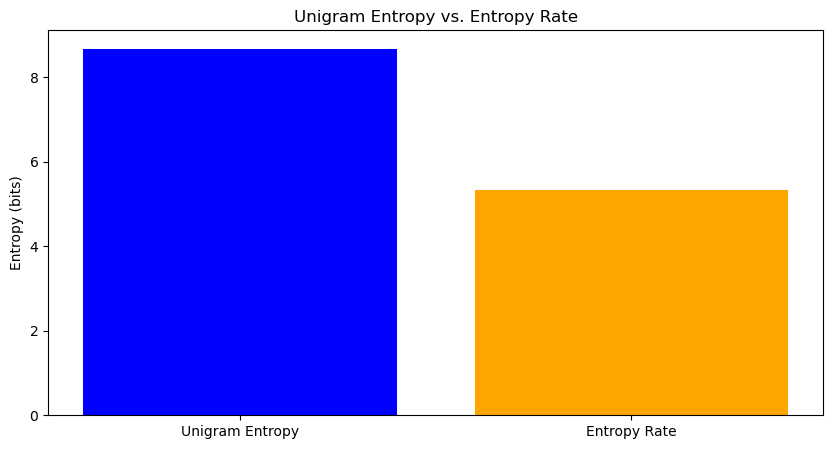

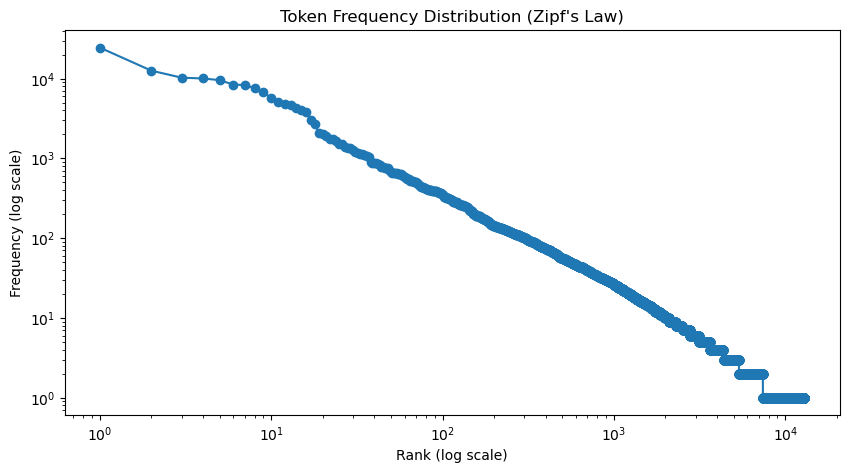

Entropy Rate: 5.3193 bits


In [2]:
from itertools import islice
import matplotlib.pyplot as plt

# Step 1: Generate n-grams (bigrams for simplicity)
def generate_ngrams(tokens, n):
    return zip(*[islice(tokens, i, None) for i in range(n)])

# Generate bigrams
bigrams = list(generate_ngrams(tokens, 2))

# Step 2: Count n-grams and calculate conditional probabilities
bigram_counts = Counter(bigrams)
unigram_counts = token_counts  # From previous unigram calculations

# Conditional probabilities: P(w_i | w_{i-1}) = Count(w_{i-1}, w_i) / Count(w_{i-1})
conditional_probabilities = {
    bigram: count / unigram_counts[bigram[0]]
    for bigram, count in bigram_counts.items()
}

# Step 3: Compute entropy rate
# Directly use bigram_counts and conditional_probabilities
entropy_rate = -sum(
    (count / total_tokens) * math.log2(prob)
    for bigram, count in bigram_counts.items()
    for prob in [conditional_probabilities[bigram]]
)

# Step 4: Visualization

# 4.1: Unigram entropy vs. Entropy rate
plt.figure(figsize=(10, 5))
plt.bar(["Unigram Entropy", "Entropy Rate"], [unigram_entropy, entropy_rate], color=["blue", "orange"])
plt.ylabel("Entropy (bits)")
plt.title("Unigram Entropy vs. Entropy Rate")
plt.show()

# 4.2: Token frequency distribution (log-log plot)
token_frequencies = sorted(token_counts.values(), reverse=True)
plt.figure(figsize=(10, 5))
plt.loglog(range(1, len(token_frequencies) + 1), token_frequencies, marker="o")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Token Frequency Distribution (Zipf's Law)")
plt.show()

print(f"Entropy Rate: {entropy_rate:.4f} bits")

In [6]:
# Self-information for unigrams
word_information_content = {
    word: -math.log2(count / total_tokens)
    for word, count in token_counts.items()
}

# Rank unigrams by information content
most_informative_words = sorted(word_information_content.items(), key=lambda x: x[1], reverse=True)

# Conditional self-information for bigrams
bigram_information_content = {
    bigram: -math.log2(count / unigram_counts[bigram[0]])
    for bigram, count in bigram_counts.items()
}

# Rank bigrams by conditional self-information
most_informative_bigrams = sorted(bigram_information_content.items(), key=lambda x: x[1], reverse=True)

# Display results
print("Top 10 Most Informative Words:")
for word, info in most_informative_words[:8000]:
    print(f"{word}: {info:.4f} bits")

print("\nTop 10 Most Informative Bigrams:")
for bigram, info in most_informative_bigrams[:1]:
    print(f"{bigram}: {info:.4f} bits")

Top 10 Most Informative Words:
即座: 18.2383 bits
再度: 18.2383 bits
一流: 18.2383 bits
揃える: 18.2383 bits
潰さ: 18.2383 bits
増やせ: 18.2383 bits
充分: 18.2383 bits
いえよう: 18.2383 bits
巻か: 18.2383 bits
れろ: 18.2383 bits
塞ぐ: 18.2383 bits
惜しみ: 18.2383 bits
荒廃: 18.2383 bits
折り: 18.2383 bits
開闢: 18.2383 bits
死し: 18.2383 bits
昇り: 18.2383 bits
依ら: 18.2383 bits
尽くせる: 18.2383 bits
売却: 18.2383 bits
土台: 18.2383 bits
浸し: 18.2383 bits
信仰心: 18.2383 bits
信じれ: 18.2383 bits
とどろい: 18.2383 bits
回せ: 18.2383 bits
配れる: 18.2383 bits
10002: 18.2383 bits
ピッケル: 18.2383 bits
地べた: 18.2383 bits
はいずる: 18.2383 bits
ばらまい: 18.2383 bits
ケチ: 18.2383 bits
8002: 18.2383 bits
たまーに: 18.2383 bits
恋しい: 18.2383 bits
羨ましく: 18.2383 bits
2002: 18.2383 bits
エイヤッホイサッ: 18.2383 bits
4002: 18.2383 bits
掘る: 18.2383 bits
コツ: 18.2383 bits
無心: 18.2383 bits
続けりゃ: 18.2383 bits
掘り出せ: 18.2383 bits
ひと休み: 18.2383 bits
6002: 18.2383 bits
ググッ: 18.2383 bits
溜まれ: 18.2383 bits
掘り起こせる: 18.2383 bits
掘り出せる: 18.2383 bits
高慢: 18.2383 bits
汗水: 18.2383 bits
探索: 18.2383 